# 新浪微博用户画像之特征提取与构建模型

---
** 记录程序时间 **

---

In [37]:
import datetime
startTime = datetime.datetime.now()

## 1. 导入库

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# 机器学习库
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## 2. 导入数据

In [39]:
full_end = pd.read_csv('full_end.csv')

## 3. 标签映射

In [40]:
gender_map = {'m':1, 'f':0}
full_end['gender'] = list(map(lambda x: gender_map[x], full_end['gender']))

In [41]:
del full_end['Unnamed: 0']

## 4. 特征选择

In [42]:
corrDf = full_end.corr()
corr_gender = corrDf['gender'].sort_values(ascending = False)
corr_gender

gender           1.000000
local_7          0.125529
local_22         0.111994
local_1          0.078797
local_3          0.078797
local_13         0.078797
local_8          0.078797
local_33         0.073556
textRating       0.058905
local_29         0.055580
local_17         0.055580
local_2          0.055580
local_5          0.055580
local_16         0.039420
local_14         0.038278
local_15         0.026231
timeRating       0.021377
local_24        -0.005150
local_6         -0.005150
comment_count   -0.012217
reposts_count   -0.012217
local_32        -0.016712
local_19        -0.017225
local_23        -0.028678
local_31        -0.033742
local_36        -0.059654
local_18        -0.071113
local_37        -0.071113
local_10        -0.089070
local_12        -0.089070
local_34        -0.089070
local_20        -0.089070
local_26        -0.106610
local_21        -0.106610
local_28        -0.155043
user_id         -0.302842
local_4               NaN
local_9               NaN
local_25    

In [43]:
# full_X = full_end[['textRating', 'local_3',  'local_7', 'local_2', 'local_4', 'local_5']]
full_X = full_end[[x for x in corr_gender.index[1:9]]]
full_log = full_end[[x for x in corr_gender.index[1:16]]]
#full_X = full_end['textRating']
full_y = full_end[['gender']]

## 5. 构建模型

> 5.1 逻辑回归模型

> 5.2 k近邻模型

#### 逻辑回归模型

In [44]:
X_train, X_test, y_train, y_test = train_test_split(full_X, full_y, random_state = 76)
# X_train = X_train.values.reshape(-1,1)
# X_test = X_test.values.reshape(-1,1)
model_locistic = LogisticRegression()
model_locistic.fit(X_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
X_train.head()

,local_7,local_22,local_1,local_3,local_13,local_8,local_33,textRating
151,0,0,0,0,0,0,1,0.175426
150,0,0,0,0,0,0,0,-1.170929
83,0,0,0,0,0,0,0,-18.416744
202,0,0,0,0,0,0,0,-4.567020
123,0,0,0,0,0,0,0,-2.494660


In [46]:
model_locistic.score(X_test, y_test)

0.68627450980392157

#### k近邻模型

In [55]:
X_train, X_test, y_train, y_test = train_test_split(full_end[['textRating']]\
                                                    , full_y, random_state = 76)
# X_train = X_train.values.reshape(-1,1)
# X_test = X_test.values.reshape(-1,1)
# random_state = 42
textRating_score = []
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train.values.ravel())
    textRating_score.append(knn.score(X_test, y_test))
    print(knn.predict(X_test))

[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 0 1 1]
[1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1
 1 0 0 0 1 1 1 1 0 1 1 0 0 1]
[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1]
[1 0 1 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 0 0 1 1 1 1 0 1 0 1 1]
[1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 0 1 1]
[1 0 1 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 1
 1 1 0 0 0 1 1 1 0 1 1 0 0 1]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 1]
[1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 0 1]
[1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 0 0 1]


In [63]:
pd.DataFrame(knn.predict(X_test))

,0
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,0


In [66]:
y_test.merge(pd.DataFrame(knn.predict(X_test)), ignore_index=True)

TypeError: merge() got an unexpected keyword argument 'ignore_index'

In [49]:
y_test.loc[y_test['gender'] == 1].shape[0]

35

## 6. 模型评测与分析

In [50]:
text_prediction = textRating_score

In [51]:
full_end_prediction = textRating_score

In [52]:
df1 = pd.DataFrame(text_prediction, index = range(1,10),\
                  columns = ['text_prediction'])
df2 = pd.DataFrame(full_end_prediction, index = range(1,10),\
                  columns = ['full_prediction'])
df = pd.merge(df1,df2,left_index=True,right_index=True,how='outer')

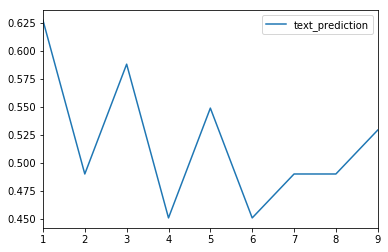

In [53]:
plt.figure()
df1.plot()

---
** 记录程序时间 **

---

In [54]:
endTime = datetime.datetime.now()
print(endTime - startTime)

0:00:00.908052
